## Initial Wrangling of GTF File

In [162]:
import pandas as pd
col_names = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'] #specified in README file
df = pd.read_csv('/scratch/trgn515_2023/datasets/Homo_sapiens.GRCh38.85.gff3.gz', compression='gzip',
                         sep='\t', comment='#', low_memory=False,
                         header=None, names=col_names)

In [163]:
df.head(20)

,seqid,source,type,start,end,score,strand,phase,attributes
0,1,GRCh38,chromosome,1,248956422,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_000001.11"
1,1,.,biological_region,10469,11240,1.3e+03,.,.,external_name=oe %3D 0.79;logic_name=cpg
2,1,.,biological_region,10650,10657,0.999,+,.,logic_name=eponine
3,1,.,biological_region,10655,10657,0.999,-,.,logic_name=eponine
4,1,.,biological_region,10678,10687,0.999,+,.,logic_name=eponine
5,1,.,biological_region,10681,10688,0.999,-,.,logic_name=eponine
6,1,.,biological_region,10707,10716,0.999,+,.,logic_name=eponine
7,1,.,biological_region,10708,10718,0.999,-,.,logic_name=eponine
8,1,.,biological_region,10735,10747,0.999,-,.,logic_name=eponine
9,1,.,biological_region,10737,10744,0.999,+,.,logic_name=eponine


#### W5-H17: Visualize the data as much as you can. How many genes/CDS/exon are listed for ENSEMBL and other datasets?


In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
#Getting value counts of each unique value for source column
Unique_Source = df['source'].value_counts()
Unique_Source

havana            1441093
ensembl_havana     745065
ensembl            228212
.                  182510
mirbase              4701
GRCh38                194
insdc                  74
Name: source, dtype: int64

<AxesSubplot:>

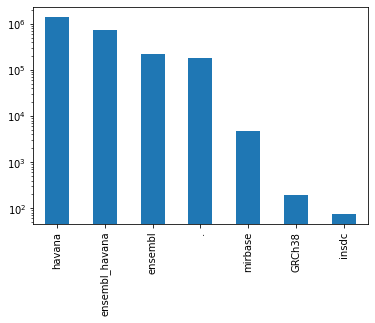

In [166]:
#Histogram of genome seperated by each source
Unique_Source.plot(kind='bar', logy=True)

In [167]:
#Pivot Table using aggfunc = 'size' to retrieve transcript numbers by source and type
pivoted_df = df.pivot_table(df, index= 'source', columns= 'type',
                      aggfunc='size', fill_value=None, margins=False,
                      dropna=True, margins_name='All')

pivoted_df

type,CDS,C_gene_segment,J_gene_segment,NMD_transcript_variant,RNA,VD_gene_segment,V_gene_segment,aberrant_processed_transcript,biological_region,chromosome,...,pseudogenic_transcript,rRNA,rRNA_gene,snRNA,snRNA_gene,snoRNA,snoRNA_gene,supercontig,three_prime_UTR,transcript
source,,,,,,,,,,,,,,,,,,,,,
.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182510.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRCh38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0,NaN,NaN
ensembl,88200.0,NaN,NaN,NaN,2221.0,NaN,NaN,NaN,NaN,NaN,...,NaN,549.0,549.0,1908.0,1908.0,936.0,936.0,NaN,9534.0,2577.0
ensembl_havana,248313.0,10.0,NaN,13247.0,NaN,NaN,14.0,26037.0,NaN,NaN,...,62.0,NaN,NaN,NaN,NaN,20.0,8.0,NaN,28251.0,79238.0
havana,368091.0,19.0,158.0,514.0,NaN,37.0,202.0,907.0,NaN,NaN,...,675.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,96153.0,14560.0
insdc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0
mirbase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
#Initial Filtering to remove Null Values
filtered_df = pivoted_df.loc[['havana', 'ensembl_havana', 'ensembl', 'mirbase', 'GRCh38', 'insdc'],['gene','CDS','exon']]
filtered_df

type,gene,CDS,exon
source,,,
havana,23073.0,368091.0,807505.0
ensembl_havana,19064.0,248313.0,268822.0
ensembl,333.0,88200.0,104269.0
mirbase,NaN,NaN,1567.0
GRCh38,NaN,NaN,NaN
insdc,15.0,NaN,NaN


In [169]:
#Extra Filtering to remove Null Values
filtered_df2 = filtered_df.loc[['havana', 'ensembl_havana', 'ensembl'],['gene','CDS','exon']]
filtered_df2

type,gene,CDS,exon
source,,,
havana,23073.0,368091.0,807505.0
ensembl_havana,19064.0,248313.0,268822.0
ensembl,333.0,88200.0,104269.0


<AxesSubplot:xlabel='DNA Source'>

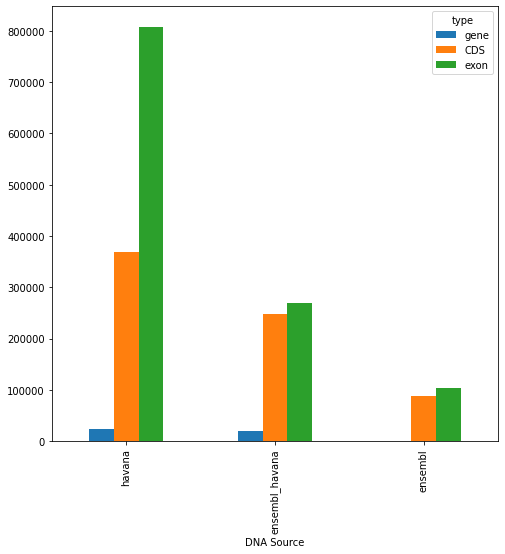

In [170]:
#Bar Graph of Transcript Source with type information
filtered_df2.plot(kind='bar', xlabel = "DNA Source", figsize=(8,8))

<AxesSubplot:xlabel='DNA Source'>

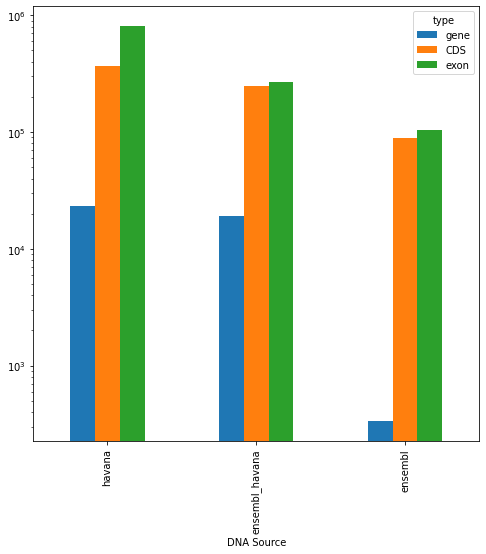

In [171]:
#Bar Graph of Transcript Source with type information (Log Scaled)
filtered_df2.plot(kind='bar', xlabel = "DNA Source", logy=True, figsize=(8,8))

#### W5-H18: Plot a histogram of length information for a) entire genome, 2) for each source, i.e., ENSEMBL, Havana, etc. separately (can use subplot)

In [172]:
#Copy of original df
gdf = df.copy() 

#Creating length column to gdf dataframe
gdf['length'] = gdf['end'] - gdf['start'] + 1

gdf.head(10)

,seqid,source,type,start,end,score,strand,phase,attributes,length
0,1,GRCh38,chromosome,1,248956422,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_000001.11",248956422
1,1,.,biological_region,10469,11240,1.3e+03,.,.,external_name=oe %3D 0.79;logic_name=cpg,772
2,1,.,biological_region,10650,10657,0.999,+,.,logic_name=eponine,8
3,1,.,biological_region,10655,10657,0.999,-,.,logic_name=eponine,3
4,1,.,biological_region,10678,10687,0.999,+,.,logic_name=eponine,10
5,1,.,biological_region,10681,10688,0.999,-,.,logic_name=eponine,8
6,1,.,biological_region,10707,10716,0.999,+,.,logic_name=eponine,10
7,1,.,biological_region,10708,10718,0.999,-,.,logic_name=eponine,11
8,1,.,biological_region,10735,10747,0.999,-,.,logic_name=eponine,13
9,1,.,biological_region,10737,10744,0.999,+,.,logic_name=eponine,8


In [173]:
#For downstream analysis
gdf.type.unique()

array(['chromosome', 'biological_region', 'gene', 'processed_transcript',
       'exon', 'pseudogenic_transcript', 'pseudogene', 'miRNA_gene',
       'miRNA', 'lincRNA_gene', 'lincRNA', 'transcript', 'CDS',
       'processed_pseudogene', 'snRNA_gene', 'snRNA', 'five_prime_UTR',
       'three_prime_UTR', 'aberrant_processed_transcript',
       'NMD_transcript_variant', 'RNA', 'snoRNA_gene', 'snoRNA',
       'rRNA_gene', 'rRNA', 'V_gene_segment', 'C_gene_segment',
       'J_gene_segment', 'VD_gene_segment', 'supercontig', 'mt_gene'],
      dtype=object)

In [174]:
gene_df = gdf[gdf.type.isin(['gene'])]
gene_df

,seqid,source,type,start,end,score,strand,phase,attributes,length
16,1,havana,gene,11869,14409,.,+,.,ID=gene:ENSG00000223972;Name=DDX11L1;biotype=transcribed_unprocessed_pseudogene;description=DEAD/H-box helicase 11 like 1 [Source:HGNC Symbol%3BAcc:HGNC:37102];gene_id=ENSG00000223972;havana_gene=OTTHUMG00000000961;havana_version=2;logic_name=havana;version=5,2541
28,1,havana,gene,14404,29570,.,-,.,ID=gene:ENSG00000227232;Name=WASH7P;biotype=unprocessed_pseudogene;description=WAS protein family homolog 7 pseudogene [Source:HGNC Symbol%3BAcc:HGNC:38034];gene_id=ENSG00000227232;havana_gene=OTTHUMG00000000958;havana_version=1;logic_name=havana;version=5,15167
71,1,havana,gene,52473,53312,.,+,.,ID=gene:ENSG00000268020;Name=OR4G4P;biotype=unprocessed_pseudogene;description=olfactory receptor family 4 subfamily G member 4 pseudogene [Source:HGNC Symbol%3BAcc:HGNC:14822];gene_id=ENSG00000268020;havana_gene=OTTHUMG00000185779;havana_version=1;logic_name=havana;version=3,840
74,1,havana,gene,62948,63887,.,+,.,ID=gene:ENSG00000240361;Name=OR4G11P;biotype=unprocessed_pseudogene;description=olfactory receptor family 4 subfamily G member 11 pseudogene [Source:HGNC Symbol%3BAcc:HGNC:31276];gene_id=ENSG00000240361;havana_gene=OTTHUMG00000001095;havana_version=2;logic_name=havana;version=1,940
77,1,ensembl_havana,gene,69091,70008,.,+,.,ID=gene:ENSG00000186092;Name=OR4F5;biotype=protein_coding;description=olfactory receptor family 4 subfamily F member 5 [Source:HGNC Symbol%3BAcc:HGNC:14825];gene_id=ENSG00000186092;havana_gene=OTTHUMG00000001094;havana_version=2;logic_name=ensembl_havana_gene;version=4,918
...,...,...,...,...,...,...,...,...,...,...
2601818,Y,havana,gene,26549425,26549743,.,+,.,ID=gene:ENSG00000224240;Name=CYCSP49;biotype=processed_pseudogene;description=cytochrome c%2C somatic pseudogene 49 [Source:HGNC Symbol%3BAcc:HGNC:23943];gene_id=ENSG00000224240;havana_gene=OTTHUMG00000036760;havana_version=1;logic_name=havana;version=1,319
2601821,Y,havana,gene,26586642,26591601,.,-,.,ID=gene:ENSG00000227629;Name=SLC25A15P1;biotype=unprocessed_pseudogene;description=solute carrier family 25 member 15 pseudogene 1 [Source:HGNC Symbol%3BAcc:HGNC:18497];gene_id=ENSG00000227629;havana_gene=OTTHUMG00000036811;havana_version=1;logic_name=havana;version=1,4960
2601826,Y,havana,gene,26594851,26634652,.,-,.,ID=gene:ENSG00000237917;Name=PARP4P1;biotype=unprocessed_pseudogene;description=poly(ADP-ribose) polymerase family member 4 pseudogene 1 [Source:HGNC Symbol%3BAcc:HGNC:18500];gene_id=ENSG00000237917;havana_gene=OTTHUMG00000036812;havana_version=1;logic_name=havana;version=1,39802
2601841,Y,havana,gene,26626520,26627159,.,-,.,ID=gene:ENSG00000231514;Name=FAM58CP;biotype=processed_pseudogene;description=family with sequence similarity 58 member C%2C pseudogene [Source:HGNC Symbol%3BAcc:HGNC:38436];gene_id=ENSG00000231514;havana_gene=OTTHUMG00000036813;havana_version=1;logic_name=havana;version=1,640


array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

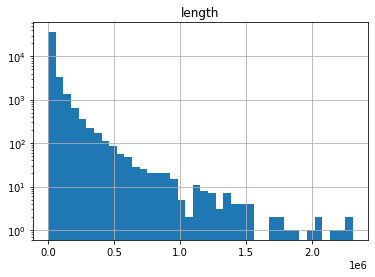

In [175]:
#Histogram of Sequence Length of Entire Genome
gene_df.hist(column='length', log=True, bins= 40)

array([[<AxesSubplot:title={'center':'ensembl'}>,
        <AxesSubplot:title={'center':'ensembl_havana'}>],
       [<AxesSubplot:title={'center':'havana'}>,
        <AxesSubplot:title={'center':'insdc'}>]], dtype=object)

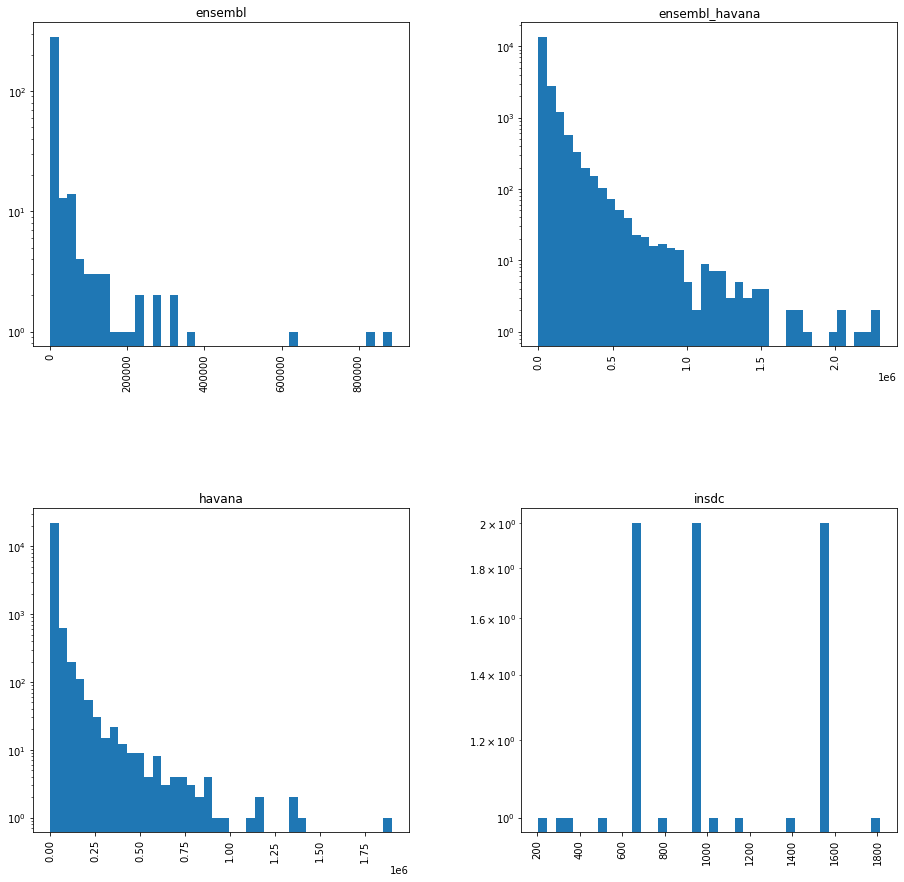

In [176]:
#Histogram of Sequence Length Seperated by Source
gene_df.hist(column='length', log=True, by='source', figsize=(15,15), bins= 40)

#### W5-H19: Parse the description column: Anything you can visualize? Visualize at least one thing.

In [177]:
#Subset of df for gene type
parsed_df = gdf[gdf.type.isin(['gene'])]

parsed_df2 = parsed_df.copy()

#Displays entire contents of columns
pd.set_option('display.max_colwidth', None)

#Retrieves 10 random values from attributes column
parsed_df2.sample(10)['attributes']

1675511                                      ID=gene:ENSG00000100078;Name=PLA2G3;biotype=protein_coding;description=phospholipase A2 group III [Source:HGNC Symbol%3BAcc:HGNC:17934];gene_id=ENSG00000100078;havana_gene=OTTHUMG00000151255;havana_version=1;logic_name=ensembl_havana_gene;version=3
936628                                                                                                                                      ID=gene:ENSG00000280131;Name=CTD-2595P9.2;biotype=TEC;gene_id=ENSG00000280131;havana_gene=OTTHUMG00000173443;havana_version=1;logic_name=havana;version=1
2171246    ID=gene:ENSG00000223912;Name=EEF1A1P36;biotype=processed_pseudogene;description=eukaryotic translation elongation factor 1 alpha 1 pseudogene 36 [Source:HGNC Symbol%3BAcc:HGNC:37914];gene_id=ENSG00000223912;havana_gene=OTTHUMG00000016340;havana_version=2;logic_name=havana;version=1
507203                                                                                                                

In [178]:
import re

RE_BIOTYPE = re.compile(r'biotype=(?P<biotype>.+?);') 
def extract_biotype(attributes_str):
    res = RE_BIOTYPE.search(attributes_str)
    return res.group('biotype')

parsed_df2['biotype'] = parsed_df2.attributes.apply(extract_biotype)
parsed_df2

,seqid,source,type,start,end,score,strand,phase,attributes,length,biotype
16,1,havana,gene,11869,14409,.,+,.,ID=gene:ENSG00000223972;Name=DDX11L1;biotype=transcribed_unprocessed_pseudogene;description=DEAD/H-box helicase 11 like 1 [Source:HGNC Symbol%3BAcc:HGNC:37102];gene_id=ENSG00000223972;havana_gene=OTTHUMG00000000961;havana_version=2;logic_name=havana;version=5,2541,transcribed_unprocessed_pseudogene
28,1,havana,gene,14404,29570,.,-,.,ID=gene:ENSG00000227232;Name=WASH7P;biotype=unprocessed_pseudogene;description=WAS protein family homolog 7 pseudogene [Source:HGNC Symbol%3BAcc:HGNC:38034];gene_id=ENSG00000227232;havana_gene=OTTHUMG00000000958;havana_version=1;logic_name=havana;version=5,15167,unprocessed_pseudogene
71,1,havana,gene,52473,53312,.,+,.,ID=gene:ENSG00000268020;Name=OR4G4P;biotype=unprocessed_pseudogene;description=olfactory receptor family 4 subfamily G member 4 pseudogene [Source:HGNC Symbol%3BAcc:HGNC:14822];gene_id=ENSG00000268020;havana_gene=OTTHUMG00000185779;havana_version=1;logic_name=havana;version=3,840,unprocessed_pseudogene
74,1,havana,gene,62948,63887,.,+,.,ID=gene:ENSG00000240361;Name=OR4G11P;biotype=unprocessed_pseudogene;description=olfactory receptor family 4 subfamily G member 11 pseudogene [Source:HGNC Symbol%3BAcc:HGNC:31276];gene_id=ENSG00000240361;havana_gene=OTTHUMG00000001095;havana_version=2;logic_name=havana;version=1,940,unprocessed_pseudogene
77,1,ensembl_havana,gene,69091,70008,.,+,.,ID=gene:ENSG00000186092;Name=OR4F5;biotype=protein_coding;description=olfactory receptor family 4 subfamily F member 5 [Source:HGNC Symbol%3BAcc:HGNC:14825];gene_id=ENSG00000186092;havana_gene=OTTHUMG00000001094;havana_version=2;logic_name=ensembl_havana_gene;version=4,918,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...
2601818,Y,havana,gene,26549425,26549743,.,+,.,ID=gene:ENSG00000224240;Name=CYCSP49;biotype=processed_pseudogene;description=cytochrome c%2C somatic pseudogene 49 [Source:HGNC Symbol%3BAcc:HGNC:23943];gene_id=ENSG00000224240;havana_gene=OTTHUMG00000036760;havana_version=1;logic_name=havana;version=1,319,processed_pseudogene
2601821,Y,havana,gene,26586642,26591601,.,-,.,ID=gene:ENSG00000227629;Name=SLC25A15P1;biotype=unprocessed_pseudogene;description=solute carrier family 25 member 15 pseudogene 1 [Source:HGNC Symbol%3BAcc:HGNC:18497];gene_id=ENSG00000227629;havana_gene=OTTHUMG00000036811;havana_version=1;logic_name=havana;version=1,4960,unprocessed_pseudogene
2601826,Y,havana,gene,26594851,26634652,.,-,.,ID=gene:ENSG00000237917;Name=PARP4P1;biotype=unprocessed_pseudogene;description=poly(ADP-ribose) polymerase family member 4 pseudogene 1 [Source:HGNC Symbol%3BAcc:HGNC:18500];gene_id=ENSG00000237917;havana_gene=OTTHUMG00000036812;havana_version=1;logic_name=havana;version=1,39802,unprocessed_pseudogene
2601841,Y,havana,gene,26626520,26627159,.,-,.,ID=gene:ENSG00000231514;Name=FAM58CP;biotype=processed_pseudogene;description=family with sequence similarity 58 member C%2C pseudogene [Source:HGNC Symbol%3BAcc:HGNC:38436];gene_id=ENSG00000231514;havana_gene=OTTHUMG00000036813;havana_version=1;logic_name=havana;version=1,640,processed_pseudogene


<AxesSubplot:>

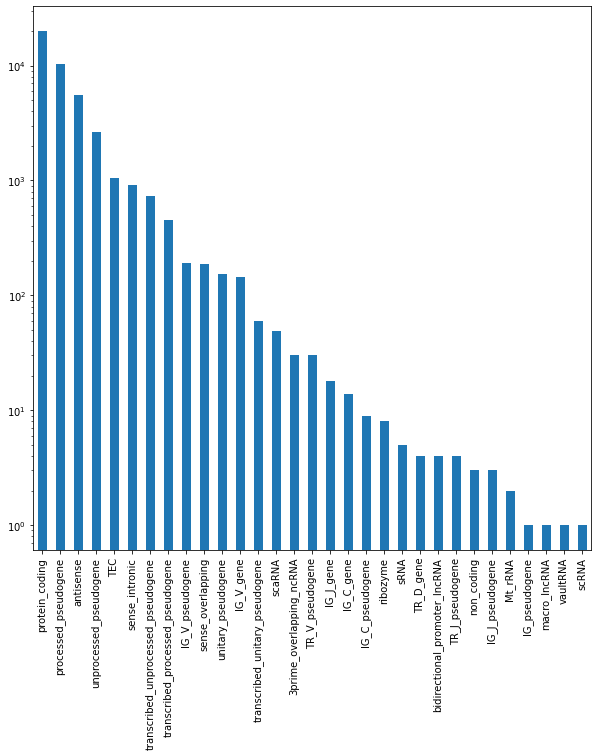

In [179]:
#Log-Scaled Histogram of Biotype of Entire Genome
Biotype_Counts = parsed_df2['biotype'].value_counts()
Biotype_Counts.plot(kind='bar', logy=True, figsize = (10,10))

#### W5-H20: Based on our dataset, how many transcripts does a gene typically have? What percentage of genes have more than 1 transcript? Hint: You will need to sum up the exon lengths to get the transcripts. You can use external libraries. 

Resources to check out
1. https://daler.github.io/gffutils/
2. http://seqanswers.com/forums/showthread.php?t=4914

See also

   #### [The GFF spec can be found here](https://www.sanger.ac.uk/resources/software/gff/spec.html)
   #### [A great explanation on the GFF format can be found here](http://gmod.org/wiki/GFF3)

In [180]:
df

,seqid,source,type,start,end,score,strand,phase,attributes
0,1,GRCh38,chromosome,1,248956422,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_000001.11"
1,1,.,biological_region,10469,11240,1.3e+03,.,.,external_name=oe %3D 0.79;logic_name=cpg
2,1,.,biological_region,10650,10657,0.999,+,.,logic_name=eponine
3,1,.,biological_region,10655,10657,0.999,-,.,logic_name=eponine
4,1,.,biological_region,10678,10687,0.999,+,.,logic_name=eponine
...,...,...,...,...,...,...,...,...,...
2601844,Y,.,biological_region,26626966,26627137,0.994,-,.,external_name=rank %3D 1;logic_name=firstef
2601845,Y,.,biological_region,26627457,26628186,0.997,+,.,external_name=rank %3D 1;logic_name=firstef
2601846,Y,havana,gene,56855244,56855488,.,+,.,ID=gene:ENSG00000235857;Name=CTBP2P1;biotype=processed_pseudogene;description=C-terminal binding protein 2 pseudogene 1 [Source:HGNC Symbol%3BAcc:HGNC:23940];gene_id=ENSG00000235857;havana_gene=OTTHUMG00000036770;havana_version=1;logic_name=havana;version=1
2601847,Y,havana,processed_pseudogene,56855244,56855488,.,+,.,ID=transcript:ENST00000431853;Parent=gene:ENSG00000235857;Name=CTBP2P1-001;biotype=processed_pseudogene;havana_transcript=OTTHUMT00000089331;havana_version=1;tag=basic;transcript_id=ENST00000431853;transcript_support_level=NA;version=1


In [181]:
df.source.unique()

array(['GRCh38', '.', 'havana', 'mirbase', 'ensembl_havana', 'ensembl',
       'insdc'], dtype=object)

In [182]:
exon_df = df[df.type.isin(['exon'])]
exon_df

,seqid,source,type,start,end,score,strand,phase,attributes
18,1,havana,exon,11869,12227,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE00002234944;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00002234944;rank=1;version=1
19,1,havana,exon,12613,12721,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE00003582793;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00003582793;rank=2;version=1
20,1,havana,exon,13221,14409,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE00002312635;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00002312635;rank=3;version=1
22,1,havana,exon,12010,12057,.,+,.,Parent=transcript:ENST00000450305;Name=ENSE00001948541;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00001948541;rank=1;version=1
23,1,havana,exon,12179,12227,.,+,.,Parent=transcript:ENST00000450305;Name=ENSE00001671638;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00001671638;rank=2;version=2
...,...,...,...,...,...,...,...,...,...
2601838,Y,havana,exon,26630647,26630749,.,-,.,Parent=transcript:ENST00000435945;Name=ENSE00001681574;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00001681574;rank=3;version=1
2601839,Y,havana,exon,26633345,26633431,.,-,.,Parent=transcript:ENST00000435945;Name=ENSE00001638296;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00001638296;rank=2;version=1
2601840,Y,havana,exon,26634523,26634652,.,-,.,Parent=transcript:ENST00000435945;Name=ENSE00001797328;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00001797328;rank=1;version=1
2601843,Y,havana,exon,26626520,26627159,.,-,.,Parent=transcript:ENST00000435741;Name=ENSE00001616687;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00001616687;rank=1;version=1


In [183]:
RE_TRANSCRIPT = re.compile(r'transcript:(?P<transcript>.+?);') 
def extract_transcript(attributes_str):
    res = RE_TRANSCRIPT.search(attributes_str)
    return res.group('transcript')

exon_df['transcript_name'] = exon_df.attributes.apply(extract_transcript)
exon_df

#Ignore warning at bottom of cell

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,seqid,source,type,start,end,score,strand,phase,attributes,transcript_name
18,1,havana,exon,11869,12227,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE00002234944;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00002234944;rank=1;version=1,ENST00000456328
19,1,havana,exon,12613,12721,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE00003582793;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00003582793;rank=2;version=1,ENST00000456328
20,1,havana,exon,13221,14409,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE00002312635;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00002312635;rank=3;version=1,ENST00000456328
22,1,havana,exon,12010,12057,.,+,.,Parent=transcript:ENST00000450305;Name=ENSE00001948541;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00001948541;rank=1;version=1,ENST00000450305
23,1,havana,exon,12179,12227,.,+,.,Parent=transcript:ENST00000450305;Name=ENSE00001671638;constitutive=0;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00001671638;rank=2;version=2,ENST00000450305
...,...,...,...,...,...,...,...,...,...,...
2601838,Y,havana,exon,26630647,26630749,.,-,.,Parent=transcript:ENST00000435945;Name=ENSE00001681574;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00001681574;rank=3;version=1,ENST00000435945
2601839,Y,havana,exon,26633345,26633431,.,-,.,Parent=transcript:ENST00000435945;Name=ENSE00001638296;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00001638296;rank=2;version=1,ENST00000435945
2601840,Y,havana,exon,26634523,26634652,.,-,.,Parent=transcript:ENST00000435945;Name=ENSE00001797328;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00001797328;rank=1;version=1,ENST00000435945
2601843,Y,havana,exon,26626520,26627159,.,-,.,Parent=transcript:ENST00000435741;Name=ENSE00001616687;constitutive=1;ensembl_end_phase=-1;ensembl_phase=-1;exon_id=ENSE00001616687;rank=1;version=1,ENST00000435741


In [184]:
Transcript_Counts = exon_df['transcript_name'].value_counts()

Transcript_Counts

ENST00000589042    363
ENST00000591111    313
ENST00000615779    312
ENST00000342992    312
ENST00000460472    191
                  ... 
ENST00000455840      1
ENST00000538173      1
ENST00000416141      1
ENST00000577855      1
ENST00000634783      1
Name: transcript_name, Length: 198002, dtype: int64

In [185]:
Transcript_Counts.mean()

5.9704598943445015

From the data wrangling, if a gene is documented in the dataset, it has an average of aproximately 6 transcripts. 

### Percentage of Genes With More Than 1 Transcript in the Genome

In [186]:
len(Transcript_Counts)/len(exon_df) * 100 

16.74912850427564

Approximately 17% of the genes have more than 1 transcript. The Transcript_Counts Series contains only genes that have been transcribed >= 1 time(s). Dividing this by the total number of transcripts (data set with exon as the type value) gives us the percentage of genes with at least 1 transcript in the genome. 